# <center> NIRS <center> Pre-Processing
***
# Table of Contents
* [READING THE DATASET INTO PYTHON](#READING-THE-DATASET-INTO-PYTHON)
* [DATA EDITING](#DATA-EDITING)
    * [Creating dummy variables (One-Hot Encode)](#Creating-dummy-variables-(One-Hot-Encode))
    * [Creating training and testing datasets](#Creating-training-and-testing-datasets)
***

## FUNCTIONS

In [1]:
# Private libary
import cmls

## READING THE DATASET INTO PYTHON

In [142]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel('Datasets/Lucas/dados_nirs_lucas.xlsx')

## DATA EDITING

In [149]:
# Transform all feautere names to string
df.columns = df.columns.map(str)

In [150]:
df

,Animal,Coleta,Aluno,Experimento,Categoria,Dieta,Status fisiologico,Peso corporal kg,Consumo MS kg/dia,Consumo MO kg/dia,...,3633.415,3629.557,3625.7,3621.843,3617.986,3614.129,3610.272,3606.415,3602.558,3598.7
0,0.0,Pré Parto - 164 - 168 dias gestação,Isabella,Mestrado,Vaca,"(PDR) Bagaço de cana de açúcar, silagem de mil...",Gestante,527.0,7.689744,7.156224,...,0.297051,0.376922,0.414575,0.370923,0.402980,0.438569,0.291648,0.354532,0.570205,0.636416
1,102.0,Pré Parto - 164 - 168 dias gestação,Isabella,Mestrado,Vaca,"(PDR) Bagaço de cana de açúcar, silagem de mil...",Gestante,524.0,7.858591,7.321476,...,0.321032,0.420550,0.391288,0.225440,0.125289,0.145890,0.204142,0.244242,0.222383,0.139091
2,13.0,Pré Parto - 164 - 168 dias gestação,Isabella,Mestrado,Vaca,"(SOY) Bagaço de cana de açúcar, silagem de mil...",Gestante,476.0,7.848189,7.436374,...,0.545665,0.562719,0.450706,0.324225,0.204198,0.143211,0.122496,0.109812,0.117597,0.063111
3,1383.0,Pré Parto - 164 - 168 dias gestação,Isabella,Mestrado,Vaca,"(CON) Bagaço de cana de açúcar, silagem de mi...",Gestante,594.0,7.335957,6.957995,...,0.066493,0.223886,0.256033,0.176935,0.177885,0.210705,0.207575,0.247724,0.301441,0.276390
4,17.0,Pré Parto - 164 - 168 dias gestação,Isabella,Mestrado,Vaca,"(PDR) Bagaço de cana de açúcar, silagem de mil...",Gestante,575.0,8.912526,8.312041,...,0.575148,0.587424,0.511461,0.328530,0.208506,0.266448,0.274464,0.273725,0.251651,0.200368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,CSC9453,ANO 2 Pré Parto - 270 dias gestação,Javier Moreno,Doutorado,Vaca,Volumoso (silagem de milho),Gestante,466.0,5.814971,5.589066,...,0.011714,-0.080064,-0.002441,0.070507,0.171221,0.313684,0.443823,0.429430,0.286096,0.170770
263,ALD1383,ANO 2 Pré Parto - 270 dias gestação,Javier Moreno,Doutorado,Vaca,Volumoso (silagem de milho),Gestante,538.0,5.999728,5.711400,...,-0.090991,-0.308692,-0.116700,0.244079,0.407548,0.362647,0.308818,0.253203,0.321587,0.257085
264,ALD1378,ANO 2 Pré Parto - 270 dias gestação,Javier Moreno,Doutorado,Vaca,Volumoso (silagem de milho),Gestante,534.0,2.321292,2.128293,...,-0.026653,-0.265636,-0.113351,0.044593,0.140338,0.222888,0.266830,0.219608,0.158773,0.127144
265,ALD1347,ANO 2 Pré Parto - 270 dias gestação,Javier Moreno,Doutorado,Vaca,Volumoso (silagem de milho),Gestante,609.0,5.118925,4.953536,...,-0.072986,-0.185276,-0.095231,0.124006,0.370194,0.539745,0.452269,0.205503,0.097278,0.084465


## SUMMARY STATISTICS

In [5]:
df.describe()

,Peso corporal kg,Consumo MS kg/dia,Consumo MO kg/dia,Consumo PB kg/dia,Consumo FDN kg/dia,Consumo EE kg/dia,Consumo CNF kg/dia,Fezes MS kg/dia,Fezes MO kg/dia,Fezes PB kg/dia,...,3633.415,3629.557,3625.7,3621.843,3617.986,3614.129,3610.272,3606.415,3602.558,3598.7
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,...,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,509.824906,6.379836,6.030204,0.619715,3.469328,0.192359,1.711190,2.704554,2.330777,0.263546,...,0.229030,0.213754,0.260170,0.291170,0.286859,0.283470,0.269462,0.242059,0.239917,0.225538
std,102.339137,2.002452,1.875748,0.336699,1.073802,0.080614,0.641736,0.795194,0.720937,0.096765,...,0.199782,0.237003,0.188358,0.156556,0.175760,0.191097,0.185356,0.187441,0.166877,0.164253
min,281.000000,1.429860,1.435228,0.092339,0.577233,0.051604,0.441309,0.760456,0.622813,0.054601,...,-0.276049,-0.395581,-0.238561,-0.024993,-0.125093,-0.180869,-0.196580,-0.261695,-0.144254,-0.129140
25%,425.500000,4.945368,4.651638,0.351819,2.707140,0.134618,1.212661,2.130980,1.851124,0.192972,...,0.107274,0.069525,0.139561,0.179395,0.165436,0.147912,0.157507,0.108506,0.116012,0.106476
50%,530.000000,6.231714,5.898576,0.568794,3.385846,0.182511,1.674349,2.681238,2.313793,0.255564,...,0.229640,0.233216,0.255576,0.287353,0.282204,0.287219,0.283499,0.255783,0.239895,0.216038
75%,582.000000,7.716805,7.304223,0.795090,4.207334,0.232064,2.106837,3.202887,2.748287,0.316227,...,0.350355,0.366050,0.391686,0.387802,0.396442,0.404799,0.388062,0.374971,0.352256,0.347993
max,744.500000,12.277564,11.729826,1.780895,6.722461,0.483549,3.866051,5.143320,4.547951,0.570620,...,0.940678,1.049306,0.902545,0.783421,0.916157,0.859193,0.886101,0.702963,0.752801,0.859664


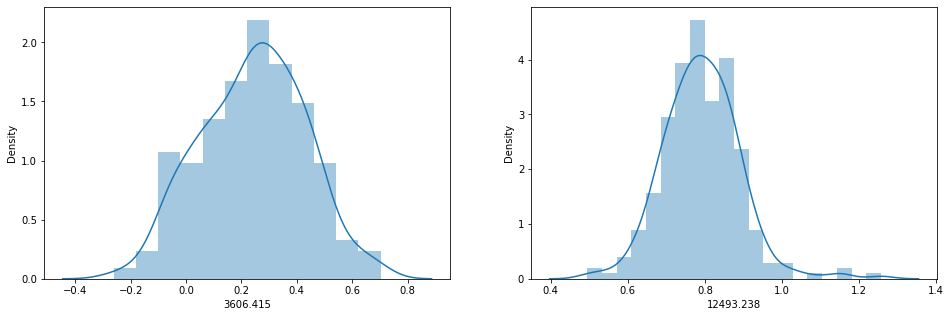

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['3606.415'])
plt.subplot(1,2,2)
sns.distplot(df['12493.238'])
plt.show()

In [7]:
df.loc[:,'12493.238':]

,12493.238,12489.381,12485.523,12481.666,12477.809,12473.952,12470.095,12466.238,12462.381,12458.523,...,3633.415,3629.557,3625.7,3621.843,3617.986,3614.129,3610.272,3606.415,3602.558,3598.7
0,0.694813,0.693530,0.691832,0.691662,0.692699,0.690240,0.684262,0.683389,0.689459,0.693701,...,0.297051,0.376922,0.414575,0.370923,0.402980,0.438569,0.291648,0.354532,0.570205,0.636416
1,0.634488,0.637065,0.637865,0.636238,0.633107,0.631523,0.632016,0.632230,0.631572,0.630250,...,0.321032,0.420550,0.391288,0.225440,0.125289,0.145890,0.204142,0.244242,0.222383,0.139091
2,0.645751,0.646358,0.644643,0.640294,0.636128,0.633839,0.633571,0.635430,0.636239,0.635277,...,0.545665,0.562719,0.450706,0.324225,0.204198,0.143211,0.122496,0.109812,0.117597,0.063111
3,0.589074,0.589516,0.585208,0.578014,0.575600,0.580763,0.585474,0.584213,0.583286,0.586672,...,0.066493,0.223886,0.256033,0.176935,0.177885,0.210705,0.207575,0.247724,0.301441,0.276390
4,0.695093,0.692740,0.692759,0.690685,0.685198,0.682580,0.684526,0.688006,0.691361,0.692790,...,0.575148,0.587424,0.511461,0.328530,0.208506,0.266448,0.274464,0.273725,0.251651,0.200368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0.855913,0.854747,0.858006,0.859808,0.854978,0.850334,0.848747,0.849106,0.848972,0.843936,...,0.011714,-0.080064,-0.002441,0.070507,0.171221,0.313684,0.443823,0.429430,0.286096,0.170770
263,0.889379,0.888781,0.886829,0.884761,0.882735,0.881070,0.877802,0.870896,0.866668,0.870520,...,-0.090991,-0.308692,-0.116700,0.244079,0.407548,0.362647,0.308818,0.253203,0.321587,0.257085
264,0.876798,0.870923,0.865248,0.865426,0.868177,0.865570,0.855866,0.847892,0.851206,0.859830,...,-0.026653,-0.265636,-0.113351,0.044593,0.140338,0.222888,0.266830,0.219608,0.158773,0.127144
265,0.851567,0.850370,0.848645,0.848228,0.852468,0.853390,0.846991,0.845604,0.850210,0.848472,...,-0.072986,-0.185276,-0.095231,0.124006,0.370194,0.539745,0.452269,0.205503,0.097278,0.084465


## DATA DIVISION

In [152]:
# Select all NIRS data as x
x = df.loc[:,'12493.238':]

In [153]:
# Add Categoria feature
# x = x.join(df.loc[:,['Categoria']])

In [154]:
# One-Hot Encode categorical features
# x = pd.get_dummies(x, drop_first=False)

In [155]:
# Non NIRS features
print(df.loc[:,:'CD CNF'].columns.tolist())

['Animal', 'Coleta', 'Aluno', 'Experimento', 'Categoria', 'Dieta', 'Status fisiologico', 'Peso corporal kg', 'Consumo MS kg/dia', 'Consumo MO kg/dia', 'Consumo PB kg/dia', 'Consumo FDN kg/dia', 'Consumo EE kg/dia', 'Consumo CNF kg/dia', 'Consumo de FDNi kg/dia', 'Fezes MS kg/dia', 'Fezes MO kg/dia', 'Fezes PB kg/dia', 'Fezes FDN kg/dia', 'Fezes EE kg/dia', 'Fezes CNF kg/dia', 'TD MO', 'TD PB', 'TD FDN', 'TD EE', 'TD CNF', 'TF MO', 'TF PB', 'TF FDN', 'TF EE', 'TF CNF', 'TF FDNpd', 'CD MS', 'CD MO', 'CD PB', 'CD FDN', 'CD EE', 'CD CNF']


In [156]:
# Response variable vector
y = df['TD PB']

In [157]:
# Split the data set into training (70%) and testing (30%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=True, random_state=40)
print("N. samples training %s , N. samples testing %s" % (x_train.shape[0], x_test.shape[0]))

N. samples training 186 , N. samples testing 81


In [158]:
corrs_td_pb = df.corr(method='pearson').loc[:, 'TD PB'].sort_values(ascending=False)

In [58]:
corrs_td_pb[:20]

TD PB                1.000000
Consumo PB kg/dia    0.775084
CD PB                0.754700
3745.271             0.433422
CD MO                0.418859
CD MS                0.389763
3741.414             0.380832
3749.128             0.323368
3629.557             0.290561
Consumo MS kg/dia    0.290535
5091.409             0.287355
5095.266             0.287333
5087.552             0.287084
5083.695             0.286872
5075.98              0.286845
5099.123             0.286843
5072.123             0.286829
5079.838             0.286820
5068.266             0.286760
5056.695             0.286755
Name: TD PB, dtype: float64

## Feature Scaling

In [159]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## MODEL SELECTION

### Hold Out

In [160]:
from sklearn.svm import SVR
svr_model = SVR()
preds = svr_model.fit(x_train, y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE
Teste,0.237847,2.100572,2.981592


In [161]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(x_train, y_train)
preds = reg.predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE
Teste,0.433039,1.914797,2.571602


In [162]:
from sklearn.linear_model import TweedieRegressor # GLM
glm = TweedieRegressor()
glm.fit(x_train, y_train)
preds = glm.predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE
Teste,0.306056,2.088778,2.845047


In [163]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=1)
preds = tree.fit(x_train,y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE
Teste,0.183671,2.330535,3.085743


In [164]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)
preds = rf.fit(x_train,y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE
Teste,0.394534,2.07446,2.657492


In [165]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=10)
preds = mlp.fit(x_train, y_train).predict(x_test)
cmls.evalute_model(y_test, preds)

,R2,MAE,RMSE
Teste,0.483662,1.879993,2.454111


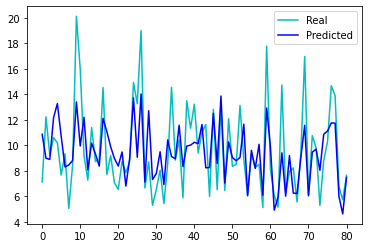

In [24]:
cmls.plot_real_vs_predict(y_test, preds)

### Cross Validation

In [166]:
x = pd.concat([pd.DataFrame(x_train), pd.DataFrame(x_test)])
y = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_test)])

In [167]:
svr_scores = cross_val_score(svr_model, x, np.ravel(y), scoring="r2", cv=5)

cmls.display_scores(svr_scores)

Scores: [0.30008449 0.09607377 0.09951154 0.20344808 0.32926023]
Mean: 0.20567561897471753
Standard deviation: 0.09744180790768106


In [168]:
BayesianRidge_scores = cross_val_score(reg, x, np.ravel(y), scoring="r2", cv=5)

cmls.display_scores(BayesianRidge_scores)

Scores: [0.5166713  0.38253139 0.25815392 0.38461953 0.50229327]
Mean: 0.40885388301691783
Standard deviation: 0.09417661257145589


In [169]:
glm_scores = cross_val_score(glm, x, np.ravel(y), scoring="r2", cv=5)

cmls.display_scores(glm_scores)

Scores: [0.34710639 0.27019311 0.13550382 0.26832385 0.37924899]
Mean: 0.2800752329444369
Standard deviation: 0.0842202528553891


In [170]:
tree_scores = cross_val_score(tree, x, np.ravel(y), scoring="r2", cv=5)

cmls.display_scores(tree_scores)

Scores: [-0.0163014   0.1356702  -0.0092888   0.14604969  0.09620778]
Mean: 0.07046749592489913
Standard deviation: 0.07002361135236479


In [171]:
rf_scores = cross_val_score(rf, x, np.ravel(y), scoring="r2", cv=5)

cmls.display_scores(rf_scores)

Scores: [0.38502089 0.32626214 0.08689848 0.32137881 0.39642033]
Mean: 0.30319613084669433
Standard deviation: 0.11227944126589218


In [172]:
mlp_scores = cross_val_score(mlp, x, np.ravel(y), scoring="r2", cv=5)

cmls.display_scores(mlp_scores)

Scores: [ 0.24944712  0.30533788 -0.04660671  0.28781631  0.47415219]
Mean: 0.25402935865385684
Standard deviation: 0.16889714433421982


## Feature Selecting

### Selection Process

In [25]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=1000)

In [26]:
x_new = selector.fit_transform(x, y)

In [27]:
#selector.get_feature_names_out()

In [28]:
# Split the data set with selected features
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.30, shuffle=True, random_state=40)

### After Selecting

In [50]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

svr_model = SVR()
svr_preds = svr_model.fit(x_train, y_train).predict(x_test)

In [51]:
print(f'R2: {r2_score(y_test, svr_preds)}')

R2: 0.17603834599300616


##  Hyperparameters search

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
def tune_svt(params):
    from sklearn.model_selection import cross_val_score
    kernel = params[0]
    degree = params[1]
    gamma = params[2]
    coef0 = params[3]
    tol = params[4]
    C = params[5]
    
    print(params, '\n')
    
    svr_model = SVR(kernel=kernel, degree=degree, gamma=gamma, coef0=coef0, tol=tol, C=C)

    r2 = cross_val_score(svr_model, x_train, y_train, cv=3, scoring ='r2')
    
    return -r2.mean()

space = [
    ['linear', 'poly', 'rbf', 'sigmoid'], #kernal
    (1, 12), #degree
    ['scale', 'auto'], # gamma
    (0.05, 3.0), # coef0
    (0.000001, 0.01), # tol
    (0.1, 3.0)] # C

In [38]:
%%time
from skopt import gp_minimize
svr_best_params = gp_minimize(tune_svt, space, random_state=0, verbose=False, n_calls=100, n_random_starts=20, n_jobs=-1)

['rbf', 10, 'scale', 2.5493926294131706, 0.0062360134041629395, 1.2147069511488298] 

['poly', 2, 'auto', 1.4591120960979826, 0.00812187511902616, 1.4919337998876667] 

['poly', 10, 'auto', 1.9621070225510322, 0.0036830471568656403, 2.875749960963835] 

['linear', 11, 'auto', 2.412686718339951, 0.005205254318032499, 2.068750637344985] 

['rbf', 7, 'scale', 2.2879160917509545, 0.0010599701642707339, 1.473441216105307] 

['poly', 9, 'auto', 0.44889361154608365, 0.0032420859369243485, 0.5340571148326813] 

['poly', 5, 'scale', 1.377352470238122, 0.006131021515383442, 2.7168108912045548] 

['linear', 12, 'scale', 0.5541832761513333, 0.0035821635175282817, 2.2769898095335237] 

['rbf', 5, 'auto', 1.9211084709741388, 0.009589533736976581, 1.9930919193159238] 

['rbf', 12, 'scale', 1.2723873352677884, 0.004747500325381842, 1.9081792932824182] 

['poly', 8, 'auto', 2.346119171976432, 0.009495760963453974, 2.021327914155129] 

['linear', 8, 'scale', 2.9172377573740147, 0.008782056520000425, 1.5

In [39]:
svr_best_params.x

['poly',
 9,
 'auto',
 1.907600781098703,
 0.005243433051932789,
 2.5967756608313697]

In [49]:
from sklearn.svm import SVR
svr_model = SVR(kernel='poly', degree=9, gamma='auto', coef0=1.907600781098703, tol=1.907600781098703, C = 1.907600781098703)

svr_model.fit(x_train, y_train)
svr_preds = svr_model.predict(x_test)
cmls.evalute_model(y_test, svr_preds)

,R2,MAE,RMSE
Teste,0.28856,2.278259,2.880687


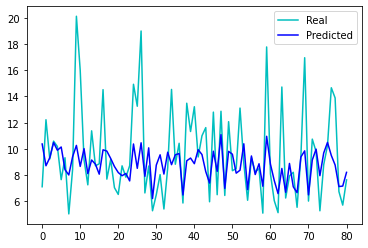

In [50]:
cmls.plot_real_vs_predict(y_test, preds)